# Exploratory data analysis of the New York subway data

In this notebook we report an exploratory data analysis of the subway data from the MTA.

A more in-dept analysis, involving prediction of the ridership and analisys of the effect of the weather is presented in the report of the final project for the Udacity course "Introduction to Data Science". The full report is available here:
https://docs.google.com/document/d/1M4n_DAjDMIndCsky8M8dyqXI-9MtJWSXlV3hxTyhFTg/


## Data wrangling

The turnstile data is available here: http://web.mta.info/developers/turnstile.html

txt files of 7 days of data each


Prior to 10/18/14 the turnstile data has the following format


Field Description: `C/A,UNIT,SCP,DATE1,TIME1,DESC1,ENTRIES1,EXITS1,DATE2,TIME2,DESC2,ENTRIES2,EXITS2,DATE3,TIME3,...`

`C/A` = Control Area (A002)  
`UNIT` = Remote Unit for a station (R051)  
`SCP` = Subunit Channel Position represents an specific address for a device (02-00-00)  `
`DATEn` = Represents the date (MM-DD-YY)  
`TIMEn` = Represents the time (hh:mm:ss) for a scheduled audit event   
`DEScn` = Represent the &quot;REGULAR&quot; scheduled audit event (occurs every 4 hours)  
`ENTRIESn` = The comulative entry register value for a device   
`EXISTn` = The cumulative exit register value for a device  

Example:  
`A002,R051,02-00-00,03-21-10,00:00:00,REGULAR,002670738,000917107,03-21-10,04:00:00,REGULAR,002670738,000917107,03-21-10,08:00:00,REGULAR,002670746,000917117,03-21-10,12:00:00,REGULAR,002670790,000917166,03-21-10,16:00:00,REGULAR,002670932,000917204,03-21-10,20:00:00,REGULAR,002671164,000917230,03-22-10,00:00:00,REGULAR,002671181,000917231,03-22-10,04:00:00,REGULAR,002671181,000917231
A002,R051,02-00-00,03-22-10,08:00:00,REGULAR,002671220,000917324,03-22-10,12:00:00,REGULAR,002671364,000917640,03-22-10,16:00:00,REGULAR,002671651,000917719,03-22-10,20:00:00,REGULAR,002672430,000917789,03-23-10,00:00:00,REGULAR,002672473,000917795,03-23-10,04:00:00,REGULAR,002672474,000917795,03-23-10,08:00:00,REGULAR,002672516,000917876,03-23-10,12:00:00,REGULAR,002672652,000917934
A002,R051,02-00-00,03-23-10,16:00:00,REGULAR,002672879,000917996,03-23-10,20:00:00,REGULAR,002673636,000918073,03-24-10,00:00:00,REGULAR,002673683,000918079,03-24-10,04:00:00,REGULAR,002673683,000918079,03-24-10,08:00:00,REGULAR,002673722,000918171,03-24-10,12:00:00,REGULAR,002673876,000918514,03-24-10,16:00:00,REGULAR,002674221,000918594,03-24-10,20:00:00,REGULAR,002675082,000918671
A002,R051,02-00-00,03-25-10,00:00:00,REGULAR,002675153,000918675,03-25-10,04:00:00,REGULAR,002675153,000918675,03-25-10,08:00:00,REGULAR,002675190,000918752,03-25-10,12:00:00,REGULAR,002675345,000919053,03-25-10,16:00:00,REGULAR,002675676,000919118,03-25-10,20:00:00,REGULAR,002676557,000919179,03-26-10,00:00:00,REGULAR,002676688,000919207,03-26-10,04:00:00,REGULAR,002676694,000919208`

In [ ]:
import csv
import pandas as pd
import numpy as np
import folium

import matplotlib.pyplot as plt
%matplotlib inline

First step is re-formatting each txt data. 
To do so use the following **script**  


In [12]:
filenames = ['']

for name in filenames:
    name = 'turnstile_140104.txt'
    writeName = 'updated_'+name       
    with open(name, 'rb') as f:
        reader = csv.reader(f)     
        for row in reader:
            for w in range((len(row)-3)/5 ):   
              row_output = ",".join(row[0:3] + row[3+5*w:8+5*w])
              with open(writeName, 'a') as file:
                  file.write(row_output+"\n");   
                
# script from Udacity class on Intro to Data Science             

`A002,R051,02-00-00,07-06-13,00:00:00,REGULAR,004182206,001435880  
A002,R051,02-00-00,07-06-13,04:00:00,REGULAR,004182246,001435885  
A002,R051,02-00-00,07-06-13,08:00:00,REGULAR,004182257,001435910  
A002,R051,02-00-00,07-06-13,12:00:00,REGULAR,004182368,001435988  
A002,R051,02-00-00,07-06-13,16:00:00,REGULAR,004182489,001436035  
A002,R051,02-00-00,07-06-13,20:00:00,REGULAR,004182754,001436075  
A002,R051,02-00-00,`**`07-07-13`**,`00:00:00,REGULAR,004182881,001436090  
A002,R051,02-00-00,07-07-13,04:00:00,REGULAR,004182909,001436092                                                                                                                  
A002,R051,02-00-00,07-07-13,08:00:00,REGULAR,004182924,001436105  
A002,R051,02-00-00,07-07-13,12:00:00,REGULAR,004183004,001436156  
A002,R051,02-00-00,07-07-13,16:00:00,REGULAR,004183196,001436199    
A002,R051,02-00-00,07-07-13,20:00:00,REGULAR,004183427,001436233  
A002,R051,02-00-00,`**07-08-13**`,00:00:00,REGULAR,004183536,001436253  
A002,R051,02-00-00,07-08-13,04:00:00,REGULAR,004183555,001436257  
A002,R051,02-00-00,07-08-13,08:00:00,REGULAR,004183592,001436324  
A002,R051,02-00-00,07-08-13,12:00:00,REGULAR,004183767,001436556                                                                                                                  
A002,R051,02-00-00,07-08-13,16:00:00,REGULAR,004184001,001436614  
A002,R051,02-00-00,07-08-13,20:00:00,REGULAR,004184784,001436674  
A002,R051,02-00-00,`**07-09-13**`,00:00:00,REGULAR,004184962,001436696  
A002,R051,02-00-00,07-09-13,04:00:00,REGULAR,004184983,001436699  
A002,R051,02-00-00,07-09-13,08:00:00,REGULAR,004185042,001436766  
A002,R051,02-00-00,07-09-13,12:00:00,REGULAR,004185223,001436974  
A002,R051,02-00-00,07-09-13,16:00:00,REGULAR,004185497,001437041  
A002,R051,02-00-00,07-09-13,20:00:00,REGULAR,004186425,001437101                                                                                                                   
A002,R051,02-00-00,`**07-10-13**`,00:00:00,REGULAR,004186624,001437124  
A002,R051,02-00-00,07-10-13,04:00:00,REGULAR,004186641,001437127  
A002,R051,02-00-00,07-10-13,08:00:00,REGULAR,004186673,001437222  
A002,R051,02-00-00,07-10-13,12:00:00,REGULAR,004186822,001437453  
A002,R051,02-00-00,07-10-13,16:00:00,REGULAR,004187083,001437518  
A002,R051,02-00-00,07-10-13,20:00:00,REGULAR,004187908,001437578  
A002,R051,02-00-00,`**07-11-13**`,00:00:00,REGULAR,004188133,001437622  
A002,R051,02-00-00,07-11-13,04:00:00,REGULAR,004188156,001437624                                                                                                                   
A002,R051,02-00-00,07-11-13,08:00:00,REGULAR,004188182,001437712  
A002,R051,02-00-00,07-11-13,12:00:00,REGULAR,004188360,001437948  
A002,R051,02-00-00,07-11-13,16:00:00,REGULAR,004188655,001438012  
A002,R051,02-00-00,07-11-13,20:00:00,REGULAR,004189502,001438060  
A002,R051,02-00-00,`**07-12-13**`,00:00:00,REGULAR,004189718,001438093  
A002,R051,02-00-00,07-12-13,04:00:00,REGULAR,004189747,001438096  
A002,R051,02-00-00,07-12-13,08:00:00,REGULAR,004189785,001438180  
A002,R051,02-00-00,07-12-13,12:00:00,REGULAR,004189944,001438376                                                                                                                   
A002,R051,02-00-00,07-12-13,16:00:00,REGULAR,004190331,001438452  
A002,R051,02-00-00,07-12-13,20:00:00,REGULAR,004191074,001438493                                                                                                                                                                                                                                                                                                                                                                                                        
A002,R051,`**02-00-01**`,`**07-06-13**`,00:00:00,REGULAR,003956274,000859442  
A002,R051,02-00-01,07-06-13,04:00:00,REGULAR,003956297,000859443  
A002,R051,02-00-01,07-06-13,08:00:00,REGULAR,003956308,000859456  
A002,R051,02-00-01,07-06-13,12:00:00,REGULAR,003956390,000859488  
A002,R051,02-00-01,07-06-13,16:00:00,REGULAR,003956647,000859537  
A002,R051,02-00-01,07-06-13,20:00:00,REGULAR,003956834,000859562  
A002,R051,02-00-01,`**07-07-13**`,00:00:00,REGULAR,003956923,000859582  
A002,R051,02-00-01,07-07-13,04:00:00,REGULAR,003956936,000859584                                                                                                                   
A002,R051,02-00-01,07-07-13,08:00:00,REGULAR,003956945,000859597  
A002,R051,02-00-01,07-07-13,12:00:00,REGULAR,003957024,000859623  
A002,R051,02-00-01,07-07-13,16:00:00,REGULAR,003957199,000859660  
A002,R051,02-00-01,07-07-13,20:00:00,REGULAR,003957387,000859692  
A002,R051,02-00-01,`**07-08-13**`,00:00:00,REGULAR,003957470,000859702  
A002,R051,02-00-01,07-08-13,04:00:00,REGULAR,003957479,000859705  
A002,R051,02-00-01,07-08-13,08:00:00,REGULAR,003957511,000859745  
A002,R051,02-00-01,07-08-13,12:00:00,REGULAR,003957690,000859875                                                                                                                   
A002,R051,02-00-01,07-08-13,16:00:00,REGULAR,003957905,000859920  
A002,R051,02-00-01,07-08-13,20:00:00,REGULAR,003958541,000859966  
A002,R051,02-00-01,`**07-09-13**`,00:00:00,REGULAR,003958696,000859992  
A002,R051,02-00-01,07-09-13,04:00:00,REGULAR,003958713,000859995  
A002,R051,02-00-01,07-09-13,08:00:00,REGULAR,003958743,000860049  
A002,R051,02-00-01,07-09-13,12:00:00,REGULAR,003958902,000860189  
A002,R051,02-00-01,07-09-13,16:00:00,REGULAR,003959062,000860230  
A002,R051,02-00-01,07-09-13,20:00:00,REGULAR,003959747,000860282                                                                                                                   
A002,R051,02-00-01,`**07-10-13**`,00:00:00,REGULAR,003959875,000860309  
A002,R051,02-00-01,07-10-13,04:00:00,REGULAR,003959883,000860311  
A002,R051,02-00-01,07-10-13,08:00:00,REGULAR,003959913,000860340  
A002,R051,02-00-01,07-10-13,12:00:00,REGULAR,003960039,000860469  
A002,R051,02-00-01,07-10-13,16:00:00,REGULAR,003960236,000860528  
A002,R051,02-00-01,07-10-13,20:00:00,REGULAR,003960881,000860571  
A002,R051,02-00-01,`**07-11-13**`,00:00:00,REGULAR,003961012,000860608  
A002,R051,02-00-01,07-11-13,04:00:00,REGULAR,003961023,000860612                                                                                                                   
A002,R051,02-00-01,07-11-13,08:00:00,REGULAR,003961050,000860646  
A002,R051,02-00-01,07-11-13,12:00:00,REGULAR,003961198,000860752  
A002,R051,02-00-01,07-11-13,16:00:00,REGULAR,003961432,000860805  
A002,R051,02-00-01,07-11-13,20:00:00,REGULAR,003962107,000860852  
A002,R051,02-00-01,`**07-12-13**`,00:00:00,REGULAR,003962278,000860875  
A002,R051,02-00-01,07-12-13,04:00:00,REGULAR,003962298,000860876  
A002,R051,02-00-01,07-12-13,08:00:00,REGULAR,003962329,000860908  
A002,R051,02-00-01,07-12-13,12:00:00,REGULAR,003962445,000861056                                                                                                                   
A002,R051,02-00-01,07-12-13,16:00:00,REGULAR,003962609,000861127   
A002,R051,02-00-01,07-12-13,20:00:00,REGULAR,003963393,000861172`

Then assembled all those files together in a single file, available here: MTA_2013_07-12.txt

In [1]:
df = pd.read_csv('MTA_2013_07-12.txt')
df.columns = ['C/A', 'UNIT', 'SCP', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']
df.head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,06-29-13,04:00:00,REGULAR,4174628,1433675
1,A002,R051,02-00-00,06-29-13,08:00:00,REGULAR,4174641,1433706
2,A002,R051,02-00-00,06-29-13,12:00:00,REGULAR,4174741,1433775
3,A002,R051,02-00-00,06-29-13,16:00:00,REGULAR,4174936,1433826
4,A002,R051,02-00-00,06-29-13,20:00:00,REGULAR,4175270,1433877


In [2]:
df.tail()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS
5649968,TRAM2,R469,00-05-01,01-03-14,04:00:00,RECOVR AUD,5554,147
5649969,TRAM2,R469,00-05-01,01-03-14,08:00:00,REGULAR,5554,147
5649970,TRAM2,R469,00-05-01,01-03-14,12:00:00,REGULAR,5554,147
5649971,TRAM2,R469,00-05-01,01-03-14,16:00:00,REGULAR,5554,147
5649972,TRAM2,R469,00-05-01,01-03-14,20:00:00,REGULAR,5554,147


We remove non-regular longs which account for about 14% of the total $  5.65 \times 10^6$ logs.

In [2]:
float(df[df['DESC']!='REGULAR'].count()[1])/float(df[df['DESC']=='REGULAR'].count()[1])

0.13644529075940856

In [3]:
df = df.drop(df.index[df['DESC']!='REGULAR'])

We remove also times sampled at strange times which account for another 9% of the logs.

In [4]:
times = ['00:00:00', '01:00:00' , '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00',  \
           '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', \
           '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', \
           '21:00:00',  '22:00:00', '23:00:00']     
#times = ['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00']
float(df[~df['TIME'].isin(times)].count()[1])/float(df[df['TIME'].isin(times)].count()[1])

0.09344478879304752

In [5]:
df_odd = df[~df['TIME'].isin(times)].count()
#df_odd.groupby('SCP')['ENTRIES']   to fixxx!!!

In [8]:
df = df[df['TIME'].isin(times)]
df['TIME'].describe()

4546749

In [ ]:
df = df[~df['TIME'].isin(times)]

In order to get the entries/exits within each (4 hour) timewindow, we subtract subsequent ENTRIES values

In [9]:
df['ENTRIES_shifted'] = df.groupby('SCP')['ENTRIES'].shift() 
df['ENTRIESn_hourly'] = df['ENTRIES'] - df['ENTRIES_shifted']
df = df.drop('ENTRIES_shifted', 1)

df['EXITS_shifted'] = df.groupby('SCP')['EXITS'].shift() 
df['EXITSn_hourly'] = df['EXITS'] - df['EXITS_shifted']
df = df.drop('EXITS_shifted', 1)

In [10]:
df[df['UNIT']=='R032'].head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIESn_hourly,EXITSn_hourly
2836,A021,R032,01-00-00,06-29-13,00:00:00,REGULAR,2924620,3475755,-1964647,-24485000
2838,A021,R032,01-00-00,06-29-13,04:00:00,REGULAR,2924707,3475793,87,38
2839,A021,R032,01-00-00,06-29-13,08:00:00,REGULAR,2924755,3475882,48,89
2840,A021,R032,01-00-00,06-29-13,12:00:00,REGULAR,2924897,3476352,142,470
2841,A021,R032,01-00-00,06-29-13,16:00:00,REGULAR,2925150,3476854,253,502


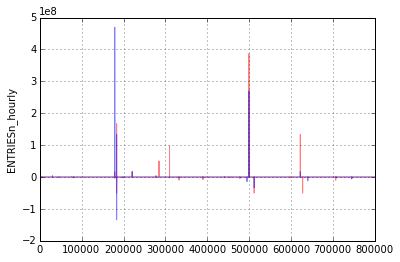

In [30]:
headsize = 800000
fig, ax = plt.subplots()
rects1 = ax.plot(df['ENTRIESn_hourly'].head(headsize), color='r', alpha=0.5)
rects2 = ax.plot(df['EXITSn_hourly'  ].head(headsize), color='b', alpha=0.5)   
plt.ylabel('ENTRIESn_hourly')  
plt.grid(True)   
plt.show()


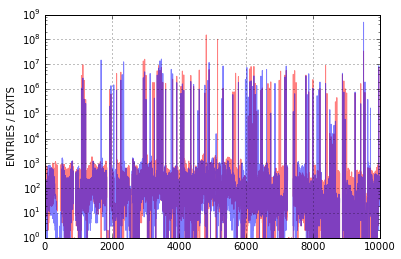

In [22]:
headsize = 10000
fig, ax = plt.subplots()
rects1 = ax.plot(df['ENTRIESn_hourly'].head(headsize), color='r', alpha=0.5)    
rects2 = ax.plot(df['EXITSn_hourly'  ].head(headsize), color='b', alpha=0.5)    
plt.ylabel('ENTRIES / EXITS')
ax.set_yscale('log')   
plt.grid(True)   
plt.show()


In [25]:
 df['SCP_shifted'] = df['SCP'].shift() 
 df['SCP_bool'] = df['SCP'] == df['SCP_shifted'] 
 df = df.drop(df.index[df['SCP_bool']==False])

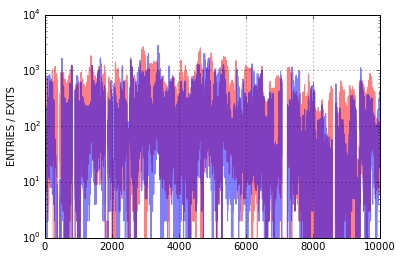

In [26]:
headsize = 10000
fig, ax = plt.subplots()
rects1 = ax.plot(df['ENTRIESn_hourly'].head(headsize), color='r', alpha=0.5)    
rects2 = ax.plot(df['EXITSn_hourly'  ].head(headsize), color='b', alpha=0.5)    
plt.ylabel('ENTRIES / EXITS')
ax.set_yscale('log')   
plt.grid(True)   
plt.show()

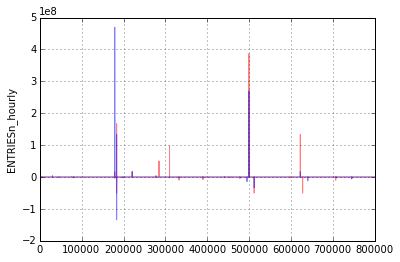

In [29]:
headsize = 800000
fig, ax = plt.subplots()
rects1 = ax.plot(df['ENTRIESn_hourly'].head(headsize), color='r', alpha=0.5)
rects2 = ax.plot(df['EXITSn_hourly'  ].head(headsize), color='b', alpha=0.5)   
plt.ylabel('ENTRIESn_hourly')  
plt.grid(True)   
plt.show()

In [31]:
filter_value = 50000

df[df['ENTRIESn_hourly']<0].count()
df[df['ENTRIESn_hourly']>filter_value].count()

df[df['EXITSn_hourly']<0].count()
df[df['EXITSn_hourly']>filter_value].count()


df = df.drop(df.index[df['ENTRIESn_hourly']>filter_value])
df = df.drop(df.index[df['ENTRIESn_hourly']<0])

df = df.drop(df.index[df['EXITSn_hourly']>filter_value])
df = df.drop(df.index[df['EXITSn_hourly']<0])

df = df.reset_index(drop=True)

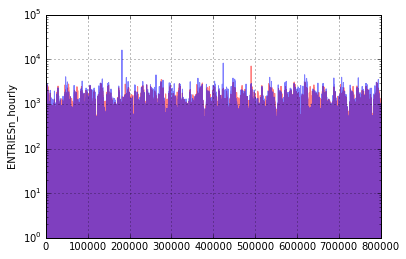

In [33]:
headsize = 800000
fig, ax = plt.subplots()
rects1 = ax.plot(df['ENTRIESn_hourly'].head(headsize), color='r', alpha=0.5)
rects2 = ax.plot(df['EXITSn_hourly'  ].head(headsize), color='b', alpha=0.5)   
plt.ylabel('ENTRIESn_hourly')  
ax.set_yscale('log')   
plt.grid(True)   
plt.show()

In [38]:
df['day'] = pd.DatetimeIndex(df['DATE']).weekday
df['Hour'] = df['TIME'].apply(lambda x: int(x[0:2])) 

Geocoded data from https://github.com/chriswhong/nycturnstiles/blob/master/geocoded.csv  


In [37]:
geocoded = pd.read_csv('geocoded.csv')
geocoded.columns = [ 'UNIT', 'C/A', 'STATION', 'LINENAME', 'DIVISION', 'LAT', 'LNG']
geocoded.head(15)

,UNIT,C/A,STATION,LINENAME,DIVISION,LAT,LNG
0,R544,PTH02,HARRISON,1,PTH,40.738879,-74.155533
1,R165,S102,TOMPKINSVILLE,1,SRT,40.636948,-74.074824
2,R070,S101,ST. GEORGE,1,SRT,40.643738,-74.073622
3,R070,S101A,ST. GEORGE,1,SRT,40.643738,-74.073622
4,R552,PTH03,JOURNAL SQUARE,1,PTH,40.732102,-74.063915
5,R551,PTH04,GROVE STREET,1,PTH,40.719876,-74.042616
6,R543,PTH05,EXCHANGE PLACE,1,PTH,40.716737,-74.033024
7,R216,C027,BAY RIDGE-95 ST,R,BMT,40.616624,-74.030964
8,R216,C028,BAY RIDGE-95 ST,R,BMT,40.616624,-74.030964
9,R215,C025,86 ST,R,BMT,40.622715,-74.028368


In [ ]:
ca_to_station = geocoded.set_index('C/A')['STATION'].to_dict() 
df['STATION'] = df['C/A']
df = df.replace({'STATION': ca_to_station})

# joint

ca_to_linename = geocoded.set_index('C/A')['LINENAME'].to_dict() 
df['LINENAME'] = df['C/A']
df = df.replace({'LINENAME': ca_to_linename})

ca_to_latitude = geocoded.set_index('C/A')['LAT'].to_dict() 
df['LAT'] = df['C/A']
df = df.replace({'LAT': ca_to_latitude})

ca_to_longitude = geocoded.set_index('C/A')['LNG'].to_dict() 
df['LNG'] = df['C/A']
df = df.replace({'LNG': ca_to_longitude})

Saving the data 

In [ ]:
file_name = 'turnstile.pkl'
df.to_pickle(file_name) 

Same UNIT may have different Stations name and viceversa - see below.

In [17]:
geocoded[342:348]

,UNIT,C/A,STATION,LINENAME,DIVISION,LAT,LNG
342,R050,A004,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686
343,R051,A002,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686
344,R050,R244,59 ST,456NQR,IRT,40.762796,-73.967686
345,R050,R244A,59 ST,456NQR,IRT,40.762796,-73.967686
346,R051,R245,59 ST,456NQR,IRT,40.762796,-73.967686
347,R051,R245A,59 ST,456NQR,IRT,40.762796,-73.967686


## Generate aggregated data 

Aggregate data by C/S, DATE and TIME. In particular the data was split over the SCP field, that is not useful.

Then I need to re-make some of the fields.

In [ ]:
df = df.groupby(['C/A','DATE','TIME'],as_index=False).aggregate(np.sum)

df['day'] = pd.DatetimeIndex(df['DATE']).weekday
df['Hour'] = df['TIME'].apply(lambda x: int(x[0:2]))  

ca_to_station = geocoded.set_index('C/A')['STATION'].to_dict() 
df['STATION'] = df['C/A']
df = df.replace({'STATION': ca_to_station})

ca_to_linename = geocoded.set_index('C/A')['LINENAME'].to_dict() 
df['LINENAME'] = df['C/A']
df = df.replace({'LINENAME': ca_to_linename})

ca_to_latitude = geocoded.set_index('C/A')['LAT'].to_dict() 
df['LAT'] = df['C/A']
df = df.replace({'LAT': ca_to_latitude})

ca_to_longitude = geocoded.set_index('C/A')['LNG'].to_dict() 
df['LNG'] = df['C/A']
df = df.replace({'LNG': ca_to_longitude})

df['ENTRIES'] = df['ENTRIESn_hourly']
df = df.drop('ENTRIESn_hourly', 1)

df['EXITS'] = df['EXITSn_hourly']
df = df.drop('EXITSn_hourly', 1)

Aggregate data by UNIT, DATE and TIME. This is the way we want the date if we care just about the ridership by location. UNIT is mapped one-to-one to STATION and hence to the location (LAT/LNG)  (**actually it's not! - Fix**) .

In [12]:
aggregated = df.groupby(['UNIT','DATE','TIME'],as_index=False).aggregate(np.sum)
aggregated

,UNIT,DATE,TIME,ENTRIES,EXITS,ENTRIESn_hourly,EXITSn_hourly,day,Hour
0,R001,01-01-14,00:00:00,162289408,38112849,1734,1598,60,0
1,R001,01-01-14,04:00:00,162289945,38114321,537,1472,60,120
2,R001,01-01-14,08:00:00,162290281,38114858,336,537,60,240
3,R001,01-01-14,12:00:00,162291257,38117733,976,2875,60,360
4,R001,01-01-14,16:00:00,162294823,38122210,3566,4477,60,480
5,R001,01-01-14,20:00:00,162298958,38124334,4135,2124,60,600
6,R001,01-02-14,00:00:00,162299816,38125462,858,1128,90,0
7,R001,01-02-14,04:00:00,162299934,38125754,118,292,90,120
8,R001,01-02-14,08:00:00,162302286,38126778,2352,1024,90,240
9,R001,01-02-14,12:00:00,162307178,38134360,4892,7582,90,360


**By aggregating it messes up the order of the dates... Need to find out why!**

In [ ]:
df = df.groupby(['UNIT','DATE','TIME'],as_index=False).aggregate(np.sum)

df['day'] = pd.DatetimeIndex(df['DATE']).weekday
df['Hour'] = df['TIME'].apply(lambda x: int(x[0:2]))  

ca_to_station = geocoded.set_index('C/A')['STATION'].to_dict() 
df['STATION'] = df['C/A']
df = df.replace({'STATION': ca_to_station})

ca_to_linename = geocoded.set_index('C/A')['LINENAME'].to_dict() 
df['LINENAME'] = df['C/A']
df = df.replace({'LINENAME': ca_to_linename})

ca_to_latitude = geocoded.set_index('C/A')['LAT'].to_dict() 
df['LAT'] = df['C/A']
df = df.replace({'LAT': ca_to_latitude})

ca_to_longitude = geocoded.set_index('C/A')['LNG'].to_dict() 
df['LNG'] = df['C/A']
df = df.replace({'LNG': ca_to_longitude})

df['ENTRIES'] = df['ENTRIESn_hourly']
df = df.drop('ENTRIESn_hourly', 1)

df['EXITS'] = df['EXITSn_hourly']
df = df.drop('EXITSn_hourly', 1)

In [ ]:
file_name = 'turnstile_by_unit.pkl'
df.to_pickle(file_name)

In [48]:
file_name = 'turnstile_by_unit.csv'
df.to_csv(file_name)

# Data Analysis

Three datasets available:
* `turnstile.pkl`
* `turnstile_aggregated.pkl`
* `turnstile_by_unit.pkl`

As we are interested in the number of people in certain location we'll use the data aggregated by station/unit.

In [10]:
file_name = 'turnstile.pkl'
#file_name = 'turnstile_aggregated.pkl'
#file_name = 'turnstile_by_unit.pkl'
df = pd.read_pickle(file_name)

In [8]:
df['DATE']

0         01-01-14
1         01-01-14
2         01-01-14
3         01-01-14
4         01-01-14
5         01-01-14
6         01-02-14
7         01-02-14
8         01-02-14
9         01-02-14
10        01-02-14
11        01-02-14
12        01-03-14
13        01-03-14
14        01-03-14
15        01-03-14
16        01-03-14
17        01-03-14
18        06-29-13
19        06-29-13
20        06-29-13
21        06-29-13
22        06-29-13
23        06-30-13
24        06-30-13
25        06-30-13
26        06-30-13
27        06-30-13
28        06-30-13
29        07-01-13
            ...   
749019    12-26-13
749020    12-27-13
749021    12-27-13
749022    12-27-13
749023    12-27-13
749024    12-27-13
749025    12-27-13
749026    12-28-13
749027    12-28-13
749028    12-28-13
749029    12-28-13
749030    12-28-13
749031    12-29-13
749032    12-29-13
749033    12-29-13
749034    12-29-13
749035    12-29-13
749036    12-29-13
749037    12-30-13
749038    12-30-13
749039    12-30-13
749040    12

In [6]:
#file_name = 'turnstile.pkl'
#file_name = 'turnstile_aggregated.pkl'
file_name = 'turnstile_by_unit.pkl'
df = pd.read_pickle(file_name)

In [2]:
df.head(15)

,UNIT,DATE,TIME,ENTRIES,EXITS,day,Hour,STATION,LINENAME,LAT,LNG
0,R001,01-01-14,00:00:00,1734,1598,2,0,SOUTH FERRY,R1,40.703082,-74.012983
1,R001,01-01-14,04:00:00,537,1472,2,4,SOUTH FERRY,R1,40.703082,-74.012983
2,R001,01-01-14,08:00:00,336,537,2,8,SOUTH FERRY,R1,40.703082,-74.012983
3,R001,01-01-14,12:00:00,976,2875,2,12,SOUTH FERRY,R1,40.703082,-74.012983
4,R001,01-01-14,16:00:00,3566,4477,2,16,SOUTH FERRY,R1,40.703082,-74.012983
5,R001,01-01-14,20:00:00,4135,2124,2,20,SOUTH FERRY,R1,40.703082,-74.012983
6,R001,01-02-14,00:00:00,858,1128,3,0,SOUTH FERRY,R1,40.703082,-74.012983
7,R001,01-02-14,04:00:00,118,292,3,4,SOUTH FERRY,R1,40.703082,-74.012983
8,R001,01-02-14,08:00:00,2352,1024,3,8,SOUTH FERRY,R1,40.703082,-74.012983
9,R001,01-02-14,12:00:00,4892,7582,3,12,SOUTH FERRY,R1,40.703082,-74.012983


Let's consider the overall average by hour-window for the station of `14 ST-UNION SQ` (which corresponds to `UNIT` = R170).

In [4]:
df_union_square =  df[df['UNIT']=='R170']   
df_union_square = df_union_square.reset_index(drop=True)

byhour_union_square = df_union_square.groupby(['Hour'],as_index=False)
byhouravg_union_square = byhour_union_square.mean()  

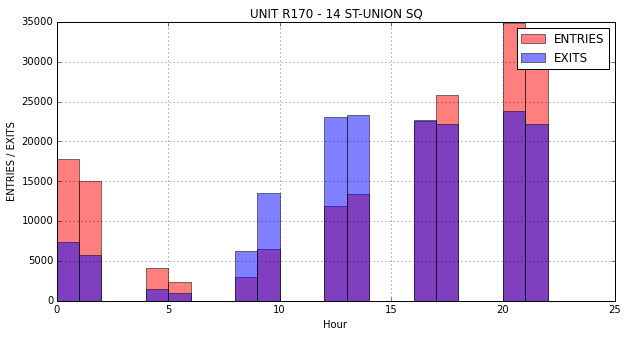

In [7]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)    
fig, ax = plt.subplots()
rects1 = ax.bar(byhouravg_union_square['Hour'], byhouravg_union_square['ENTRIES'], 1, color='r', alpha=0.5,label='ENTRIES')
rects2 = ax.bar(byhouravg_union_square['Hour'], byhouravg_union_square['EXITS'], 1, color='b', alpha=0.5,label='EXITS')
plt.xlabel('Hour')
plt.ylabel('ENTRIES / EXITS')
plt.title(r'UNIT R170 - 14 ST-UNION SQ')
plt.grid(True)
plt.legend()


The plot shows that more people are coming out from the station than entering it in the morning, and viceversa in the evening.


In [ ]:
df_union_square =  df[df['UNIT']=='R170']   
df_union_square = df_union_square.reset_index(drop=True)

byhour_union_square = df_union_square.groupby(['Hour'],as_index=False)
byhouravg_union_square = byhour_union_square.mean()  

# Ridership Map

To plot the map we use Folium https://github.com/python-visualization/folium'

Note: *In order to have the html maps generated by folium working in the browser, I needed to modify the file `fol_template.html`, adding `http:` in front of the links in the header.* 

In [7]:
geocoded = pd.read_csv('geocoded.csv').dropna()
geocoded.columns = [ 'UNIT', 'C/A', 'STATION', 'LINENAME', 'DIVISION', 'LAT', 'LNG']
locations = geocoded[['STATION','LAT','LNG']].values.tolist()

mbox = folium.Map(location=[40.74, -73.99], tiles='Mapbox Bright',
                    zoom_start=11)

for loc in locations:
    #print lat
    mbox.circle_marker(location=[loc[1],loc[2]], popup=loc[0], radius=50, 
                       fill_color='#800000', line_color='#800000')                          
                    
mbox.create_map(path='map_subway_stations.html')

del mbox

Here is a static image of the rendered html. The reason some stations are darker, is that the geocoded.csv file in not aggregated by `UNIT` (/stations) and there are multiple `C/A` for the biggest station.

In [11]:
from IPython.display import IFrame
IFrame('files/map_subway_stations.html', width=750, height=750)

In [26]:
byhour = df.groupby(['Hour','STATION'],as_index=False)
byhouravg = byhour.mean()
byhouravg.head()

,Hour,STATION,ENTRIES,EXITS,day,LAT,LNG
0,0,1 AVE,3640.174312,3807.596330,2.697248,40.730901,-73.981719
1,0,103 ST,900.792857,1178.692857,2.592857,40.795381,-73.959150
2,0,103 ST-CORONA,1128.388350,2840.980583,2.699029,40.749858,-73.862672
3,0,104 ST,118.916667,339.546296,2.722222,40.695184,-73.844326
4,0,110 ST,898.504587,1531.027523,2.697248,40.795066,-73.944297


In [30]:
geocoded = pd.read_csv('geocoded.csv').dropna()
geocoded.columns = [ 'UNIT', 'C/A', 'STATION', 'LINENAME', 'DIVISION', 'LAT', 'LNG']
locations = byhouravg[['STATION','LAT','LNG','ENTRIES','EXITS']].values.tolist()

mbox = folium.Map(location=[40.74, -73.99], tiles='Mapbox Bright',
                    zoom_start=11)

for loc in locations:
    #print lat
    mbox.circle_marker(location=[loc[1],loc[2]], popup=loc[0], radius=loc[3]/20, 
                       fill_color='#800000', line_color='#800000')     
    
    mbox.circle_marker(location=[loc[1],loc[2]], popup=loc[0], radius=loc[4]/20, 
                       fill_color='#800000', line_color='#3186cc')                       
mbox.create_map(path='map_subway_average_ridership.html')

del mbox

<img src="files/map_subway_average_ridership.png">

Test with CartoDB

<img src="files/cartodb.png">